In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.likelihood import LikelihoodClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


%load_ext autoreload
%autoreload 2

In [2]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2010')

# Load data from a JSONL file
market = Market.loader('2010/03/01','2010/04/01', data_path)

100%|██████████| 48/48 [20:40<00:00, 25.84s/it]


In [ ]:
# Get periods of length 15
periods = market.get_periods(period_length=1800)
print(f"Number of periods: {len(periods)}")

In [ ]:
clustering = LikelihoodClustering().fit(periods, generations=200, mutation_rate=0.2, num_clusters=50)

print('-' * 50)
clustering.summarize_clusters()
print('-' * 50)

Solving with PGA...: 100%|██████████| 100/100 [07:12<00:00,  4.32s/it]

Best solution : [2, 8, 9, 1, 4, 11, 4, 14, 2, 3, 5, 7, 8, 1, 14, 0, 3, 5, 4, 13, 6, 4, 7, 0, 1, 6, 7, 5, 11, 9, 4, 7, 8, 8, 4, 13, 14, 6, 12, 11, 4, 8, 0, 1, 13, 6, 3, 8, 4, 0, 5, 13, 0, 8, 7, 1, 2, 4, 12, 2, 3, 9, 0, 11, 7, 10, 8, 14, 14, 7, 14, 0, 11, 4, 0, 10, 8, 7, 5, 8, 4, 14, 6, 6, 8, 2, 6, 7, 11, 6, 5, 13, 8, 0, 6, 3, 5, 7, 4, 13, 7, 10, 1, 7, 11, 11, 5, 9, 6, 7, 13, 14, 1, 8, 5, 5, 7, 4, 13, 1, 1, 0, 0, 10, 0, 8, 0, 8, 6, 4, 13, 11, 4, 12, 7, 10, 3, 14, 6, 0, 7, 1, 0, 8, 9, 8, 1, 13, 12, 5, 14, 5, 9, 2, 13, 8, 14, 3, 14, 12, 9, 1, 1, 0, 4, 7, 9, 1, 6, 4, 12, 13, 5, 14, 0, 11, 3, 13, 1, 9, 7, 5, 0, 10, 4, 7, 4, 1, 13, 3, 0, 11, 6]
Best score : 0.9921
--------------------------------------------------
Number of periods: 193
Number of clusters: 15
Cluster sizes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cluster labels: [2, 8, 9, 1, 4, 11, 4, 14, 2, 3, 5, 7, 8, 1, 14, 0, 3, 5, 4, 13, 6, 4, 7, 0, 1, 6, 7, 5, 11, 9, 4, 7, 8, 8, 4, 13, 14, 6, 12, 11, 4, 8, 0, 1, 13, 6, 3, 8, 4, 0,

Count of periods per time:
08:00 : 21
09:00 : 22
10:00 : 22
11:00 : 22
12:00 : 22
13:00 : 22
14:00 : 22
15:00 : 21
16:00 : 19


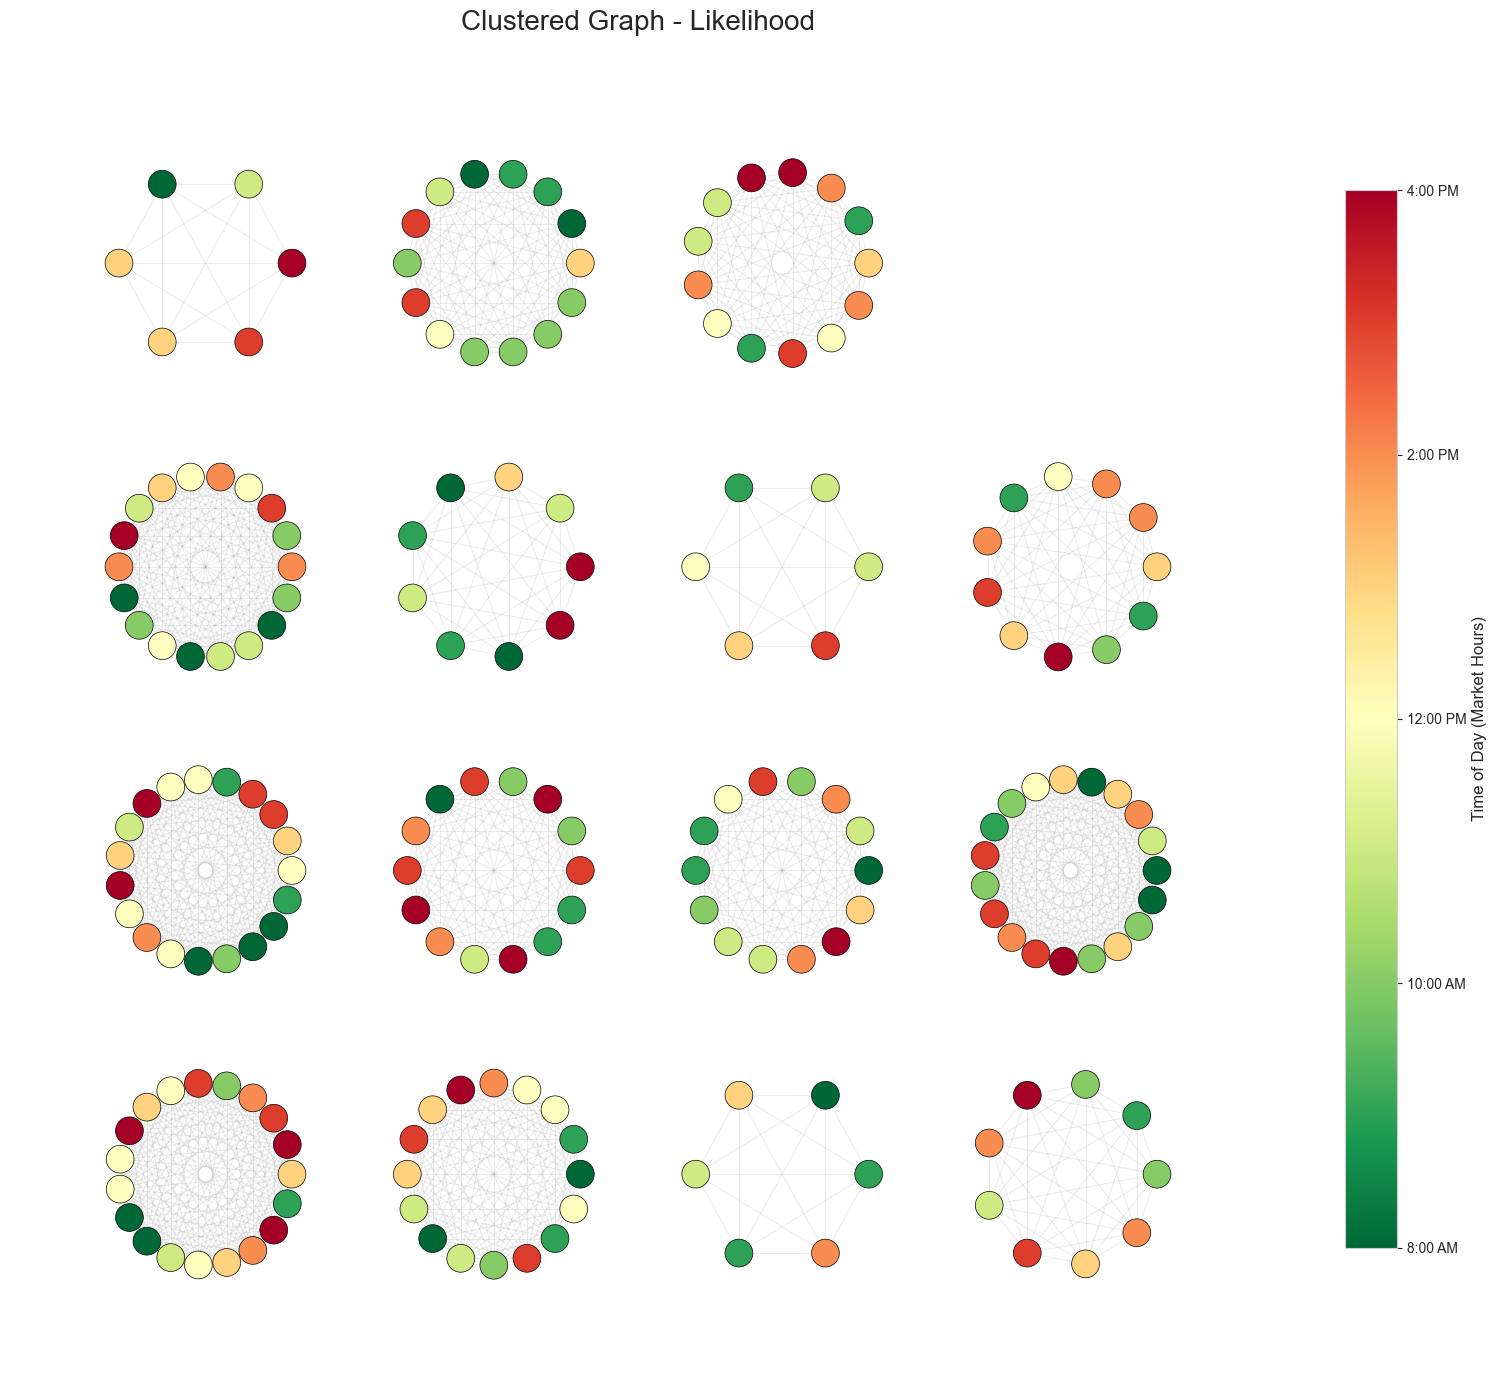

In [27]:
clustering.plot_cluster_2(method='Likelihood')

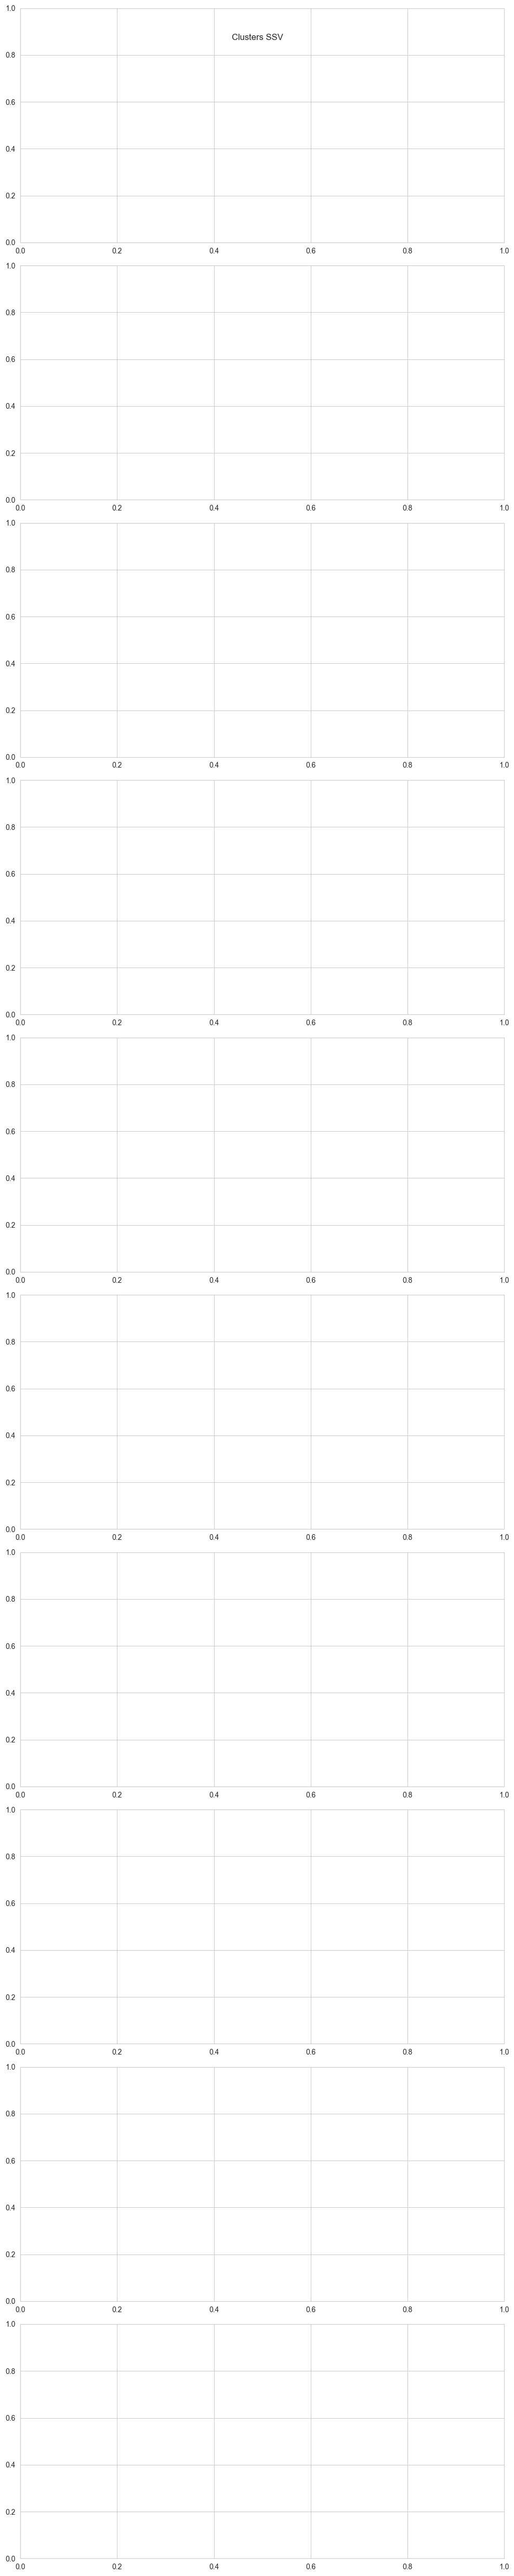

In [6]:
clustering.plot_ssv()